**KNN Model - Cotton Pulps Grades**  

In [1]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Package for Standardizing Data
from sklearn.preprocessing import StandardScaler

# Package for Partitioning Data
from sklearn.model_selection import train_test_split

# Package for KNN Model
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor 

# Packages for Model Accuracy Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading Dataset to a pandas Dataframe
CottonPulps_data = pd.read_csv('Cotton Pulps_Factors.csv')

In [3]:
# Getting Dataset Shape
CottonPulps_data.shape

(500, 21)

In [4]:
# Count Number of Records for each Grade 
CottonPulps_data['Final Grade Letter'].value_counts()

Final Grade Letter
B    267
A    183
C     50
Name: count, dtype: int64

<Axes: xlabel='Final Grade Letter', ylabel='count'>

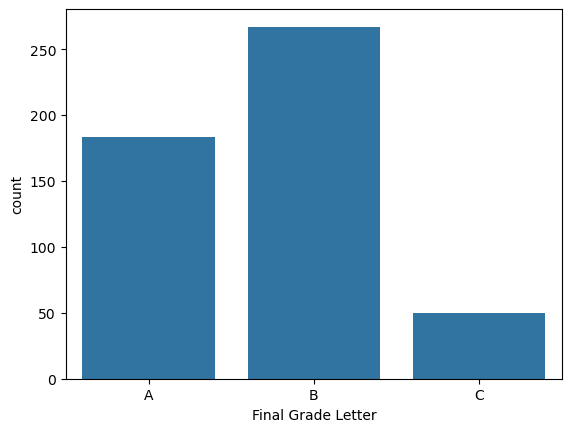

In [5]:
# Visualizing number of Records for each Class
sns.countplot(x="Final Grade Letter" , data = CottonPulps_data)

In [6]:
# Drop Unnecessary Columns
CottonPulps_data = CottonPulps_data.iloc[:, 3:].dropna(axis=0)

In [7]:
# Define Predictors (Features)
CottonPulps_data_X = CottonPulps_data.drop(columns=['Final Grade','Final Grade Letter'], axis=1)

### Converting Categorical Variables to Numerical Variables

1) Ginning Methods: 
   For all Records are Automated ---> So, no Dummy Variable is defined for it
   
   
2) Packing Method: 

   Bails --> 0 
   Rolls --> 1

In [8]:
# Define Dummy Variables for Categorical Variables 
CottonPulps_data_X = pd.get_dummies(CottonPulps_data_X,prefix_sep='_', drop_first=True)
CottonPulps_data_X = CottonPulps_data_X.astype(int)

In [9]:
# Separating Features and Target
X = CottonPulps_data_X
Y = CottonPulps_data['Final Grade Letter']

# Data Standardization

In [10]:
# Create an Instance of Scaler
scaler = StandardScaler()

In [11]:
# Fit Scaler to Features
scaler.fit(X)

StandardScaler()

In [12]:
# Transform Features 
standardized_data = scaler.transform(X)

In [14]:
# Create a Dataframe of Standardized Features
standardized_df = pd.DataFrame(standardized_data)

In [15]:
# Define Features X & Targert Y
X = standardized_df
Y = CottonPulps_data['Final Grade Letter']

In [16]:
# Adding Target Variable to Dataset
standardized_df ['Final Grade Letter'] = CottonPulps_data['Final Grade Letter']

In [17]:
# Partition Dataset to Training, Validation, & Test Sets: Training (70%) & Validation (30%)
trainData, validData = train_test_split(standardized_df, test_size=0.30, random_state=42)
print('Training: ', trainData.shape)
print('Validation: ', validData.shape)

Training:  (350, 16)
Validation:  (150, 16)


In [18]:
# Showing Records of Features in Training Set
X_train = trainData.drop(columns=['Final Grade Letter'], axis=1)

In [19]:
# Showing Records of Target in Training Set
Y_train = trainData['Final Grade Letter']

In [20]:
# Showing Records of Features in Validation Set
X_valid = validData.drop(columns=['Final Grade Letter'], axis=1)

In [21]:
# Showing Records of Target in Validation Set
Y_valid = validData['Final Grade Letter']

## Fixing Imbalanced Classes Issue

##  SMOTE Method 

SMOTE stands for Synthetic Minority Oversampling Technique  

In [22]:
# Import Required Package 
from imblearn.over_sampling import SMOTE

In [23]:
# Initialize SMOTE
smote = SMOTE()

In [24]:
# Resample data using SMOTE 
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [25]:
# Checking the new Class Balance 
pd.Series(y_resampled).value_counts()

Final Grade Letter
A    184
B    184
C    184
Name: count, dtype: int64

In [26]:
# Initiate KNN SMOTE Model: K=1
KNN_smote = KNeighborsClassifier(n_neighbors=1)

In [27]:
# Fit KNN Model with Balanced Classes to Training Set (K=1)
KNN_smote.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=1)

In [28]:
# Get Prediction for Test Data
Y_pred_k1 = KNN_smote.predict(X_valid)

In [29]:
# Accuracy on Training Balanced Classes (K=1)
X_train_smote_prediction = KNN_smote.predict(X_train)
training_data_smote_accuracy = accuracy_score(X_train_smote_prediction, Y_train)

In [30]:
print('Accuracy on Training Balanced Classes (k=1): ', training_data_smote_accuracy)

Accuracy on Training Balanced Classes (k=1):  1.0


In [31]:
# Accuracy on Validation Balanced Classes
X_valid_smote_prediction = KNN_smote.predict(X_valid)
valid_data_smote_accuracy = accuracy_score(X_valid_smote_prediction, Y_valid)

In [32]:
print('Accuracy on Validation Balanced Classes (k=1): ', valid_data_smote_accuracy)

Accuracy on Validation Balanced Classes (k=1):  0.64


## Choosing a K Value for Balanced Data-SMOTE Method

In [33]:
error_rate_smote = []

# Will take some time
for i in range(1,40):
    
    KNN_smote = KNeighborsClassifier(n_neighbors=i)
    KNN_smote.fit(X_resampled, y_resampled)
    pred_i = KNN_smote.predict(X_valid)
    error_rate_smote.append(np.mean(pred_i != Y_valid))

Text(0, 0.5, 'Error Rate SMOTE')

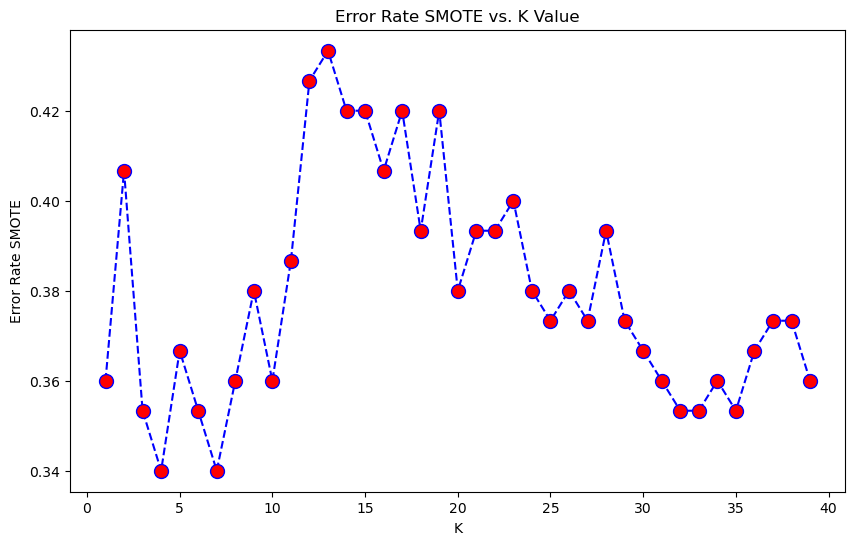

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_smote, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate SMOTE vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate SMOTE')

### Interpretation: 

Looks like K = 4 is the smallest K for which the error is the smallest

In [35]:
# Initiate KNN SMOTE Model: K=4
KNN_smote_k4 = KNeighborsClassifier(n_neighbors=4)

In [36]:
# Fit KNN Model with SMOTE Data to Training Set
KNN_smote_k4.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=4)

In [37]:
# Accuracy on Training Data for Balanced Classes (K=4)
X_train_smote_k4_prediction = KNN_smote_k4.predict(X_train)
training_data_smote_k4_accuracy = accuracy_score(X_train_smote_k4_prediction, Y_train)

In [38]:
print('Accuracy on Training Balanced Classes (k=4): ', training_data_smote_k4_accuracy)

Accuracy on Training Balanced Classes (k=4):  0.8142857142857143


In [39]:
# Accuracy on Validation Data for Balanced Classes (K=4)
X_valid_smote_k4_prediction = KNN_smote_k4.predict(X_valid)
valid_data_smote_k4_accuracy = accuracy_score(X_valid_smote_k4_prediction, Y_valid)

In [41]:
print('Accuracy on Validation Balanced Classes (k=4): ', valid_data_smote_k4_accuracy)

Accuracy on Validation Balanced Classes (k=4):  0.66


In [43]:
# Get Prediction for Validation Data Balanced Classes (K=4) 
y_pred_smote_k4 = KNN_smote_k4.predict(X_valid)

In [44]:
# Compare Prediction Values with Actual Values
print(classification_report(Y_valid , y_pred_smote_k4))

              precision    recall  f1-score   support

           A       0.66      0.94      0.78        52
           B       0.81      0.52      0.63        83
           C       0.30      0.47      0.37        15

    accuracy                           0.66       150
   macro avg       0.59      0.64      0.59       150
weighted avg       0.71      0.66      0.66       150



Text(0.5, 1.0, 'Confusion Matix - Balanced Classes with SMOTE Method (K=4)')

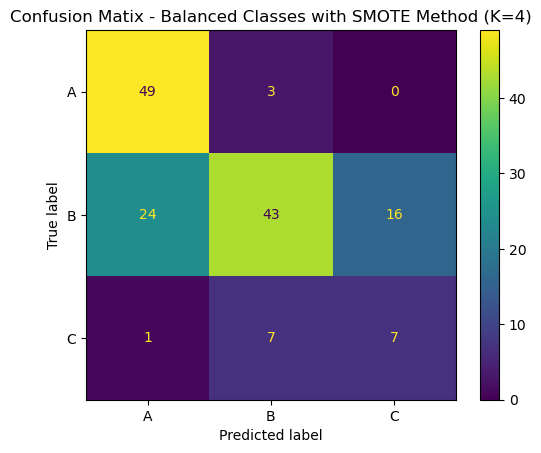

In [45]:
# Create a Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_valid, y_pred_smote_k4)
plt.title("Confusion Matix - Balanced Classes with SMOTE Method (K=4)")